In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from training_utils import CIFAR10_dataloaders, training_monitor, print_model_size

if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

In [2]:
class CNNStride(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            # Convolutional layers with strided conv instead of MaxPool
            nn.Conv2d(3, 32, kernel_size=3, padding=1, stride=2),  # Downsample
            nn.ReLU(),

            nn.Conv2d(32, 64, kernel_size=3, padding=1, stride=2),  # Downsample
            nn.ReLU(),

            # Flatten
            nn.Flatten(),

            # Fully connected layers
            nn.Linear(64 * 8 * 8, 128),
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.Linear(128, 10)  # Output layer
        )

    def forward(self, x):
        return self.model(x)

In [3]:
print_model_size(CNNStride())

Total params = 5.450980e+05
Trainable params = 5.450980e+05


Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/10 [00:00<?, ?it/s]

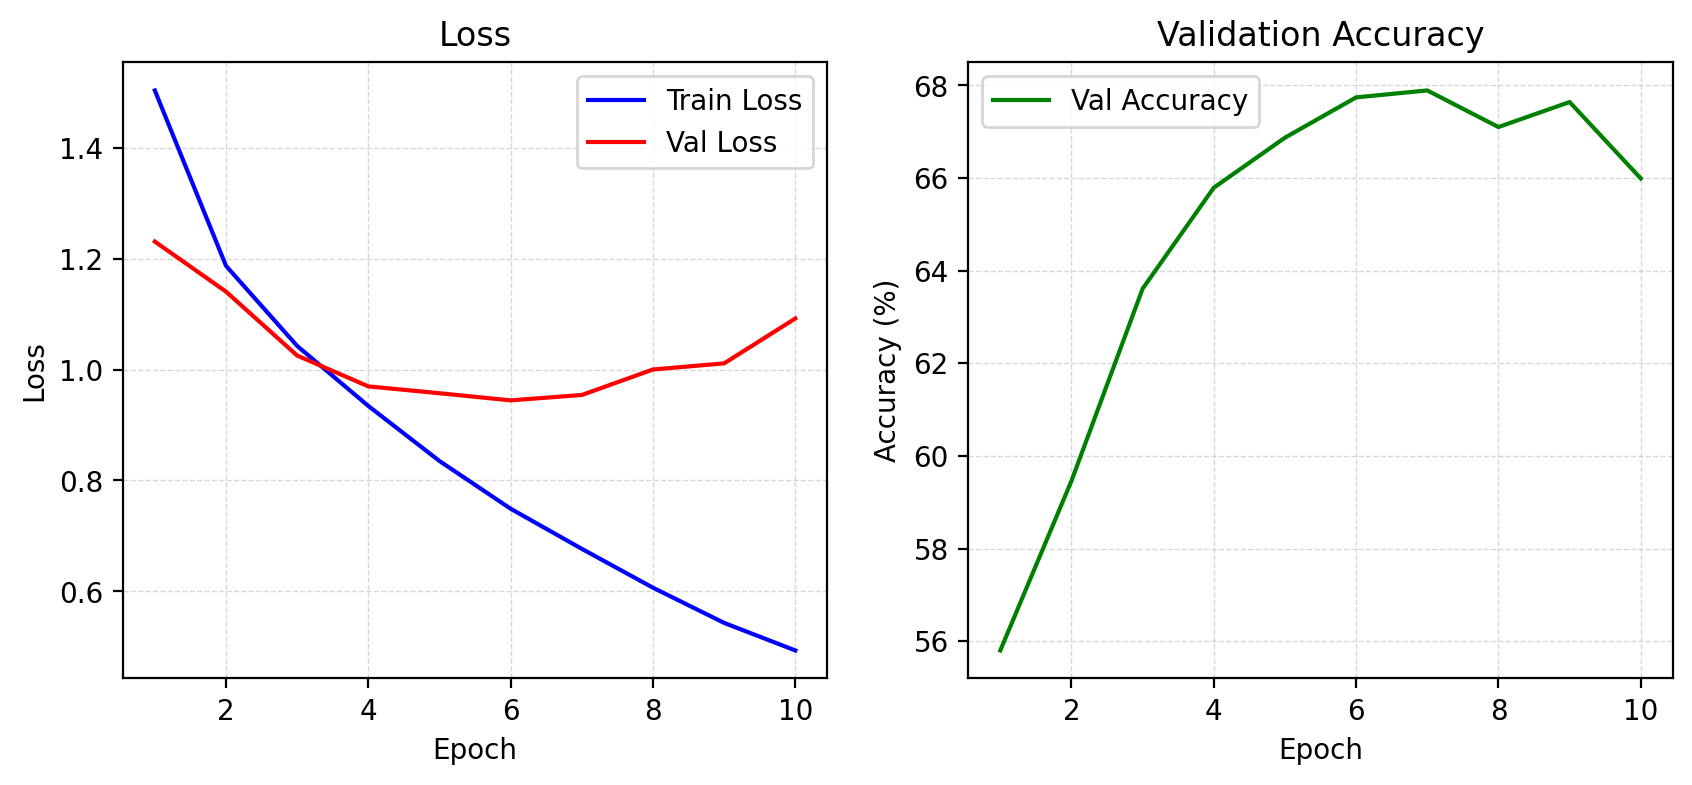

Epoch 10/10: 100%|##########| 10/10 [03:39<00:00, 25.06s/it]

|       Epoch        |     Train loss     |  Validation loss   | Validation accuracy, %  |
__________________________________________________________________________________________
|         1          |       1.5037       |       1.2310       |         55.8000         |
|         2          |       1.1872       |       1.1407       |         59.4600         |
|         3          |       1.0427       |       1.0253       |         63.6100         |
|         4          |       0.9344       |       0.9697       |         65.7900         |
|         5          |       0.8351       |       0.9574       |         66.8700         |
|         6          |       0.7490       |       0.9445       |         67.7400         |
|         7          |       0.6766       |       0.9542       |         67.8900         |
|         8          |       0.6065       |       1.0002       |         67.1000         |
|         9          |       0.5430       |       1.0113       |         67.6400         |

In [4]:
trainloader, testloader, classes = CIFAR10_dataloaders(batch_size=64)
model = CNNStride().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 10

trained_model = training_monitor(device, model, optimizer, criterion, num_epochs, trainloader, testloader)
